##  PYTHON IMPLIMENTATION :-

In [2]:
# Importing Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To Supress The Warnings
import warnings
warnings.filterwarnings('ignore')

In [47]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

## READ DATASET :-

In [3]:
data = pd.read_csv(r"C:\Users\GANESH AHIRE\Documents\AI Expert Project\PRAICP-1004-RainfallTS\Data\rainfall-monthly-number-of-rain-days.csv",index_col='month',parse_dates=True)

""" Use index_col to set column as a index
parse_date= True to make sure pandas recognize the data in time series format and does not treated the string """

data.index.freq='MS'  # Dealing with monthly data

data.head()

,no_of_rainy_days
month,
1982-01-01,10
1982-02-01,5
1982-03-01,11
1982-04-01,14
1982-05-01,10


In [4]:
# Shape of data

data.shape

(462, 1)

## BASIC OF DATA :-

In [5]:
data.tail()

,no_of_rainy_days
month,
2020-02-01,8
2020-03-01,8
2020-04-01,12
2020-05-01,16
2020-06-01,21


In [6]:
# Shape of data
data.shape

(462, 1)

* Dataset contain Total 462 Observation with 1 feature.

In [7]:
# Columns of data
data.columns

Index(['no_of_rainy_days'], dtype='object')

In [8]:
# Examin the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 462 entries, 1982-01-01 to 2020-06-01
Freq: MS
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   no_of_rainy_days  462 non-null    int64
dtypes: int64(1)
memory usage: 7.2 KB


In [9]:
# Statistical measures of data
data.describe()

,no_of_rainy_days
count,462.000000
mean,13.958874
std,4.947494
min,1.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,27.000000


## VISUALISE THE TREND :-

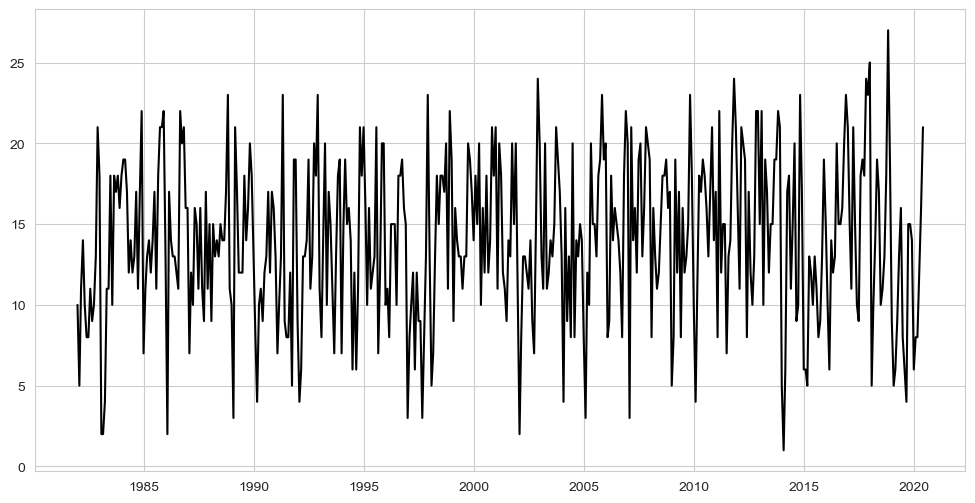

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.plot(data,color='black')
plt.show()

### Seasonal Decomposition :-
* A time series data is composed of
    * Trend: Trend is the overall direction of the data.
    *  Seasonlity: Seasonality is a periodic component which repeats itself            within a particulat time period.
    * Residuals: the residual is what’s left over when the trend and                 seasonality have been removed. Residuals are random fluctuations.

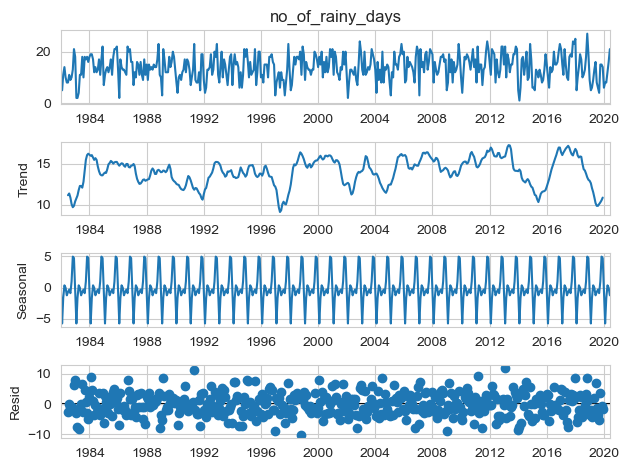

In [11]:
# Importing statsmodel
from statsmodels.tsa.seasonal import seasonal_decompose  # Decompose Different parts of time series
result = seasonal_decompose(data['no_of_rainy_days'])
result.plot();

* Looking at the plot it clearly visible that there is seasonality in the data and some trend.

## SPLIT DATA INTO TRAIN & TEST :-

## Train and Test Split :-
* Train test split in timeseries is different as copared to Machine learning Algforithms. We do random split there where the time component does'nt matters. But in time series we have information dependent on time therefore the spliting is continous without any shuffling of data.

   * Using 37 years data for training (1982-01-01 to 2019-06-01)
   * Using 1 year data for Testing (2019-06-01 to 2020-06-01)

In [12]:
len(data)-12 ## 12 is our testing period

450

In [13]:
#### training
train_data = data.iloc[:len(data)-12,:]
#### testing
test_data = data.iloc[len(data)-12:,:]

In [14]:
test_data

,no_of_rainy_days
month,
2019-07-01,8
2019-08-01,6
2019-09-01,4
2019-10-01,15
2019-11-01,15
2019-12-01,14
2020-01-01,6
2020-02-01,8
2020-03-01,8


### SCALE DATA :-

In [15]:
from sklearn.preprocessing import RobustScaler

# Object Creation
scaler = RobustScaler()

# Fitting The training data
scaler.fit(train_data)

# transform train & Test data
scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Object Creation
scaler = MinMaxScaler()

# Fitting The training data
scaler.fit(train_data)

# transform train & Test data
scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

In [17]:
# First 10 scaled values
scaled_train[:10]

array([[0.34615385],
       [0.15384615],
       [0.38461538],
       [0.5       ],
       [0.34615385],
       [0.26923077],
       [0.26923077],
       [0.38461538],
       [0.30769231],
       [0.34615385]])

In [18]:
# Creating a batches with the help of timeseries generator
from keras.preprocessing.sequence import TimeseriesGenerator

# Assuming scaled_train is your preprocessed and scaled time series data with shape (450, 1)
n_inputs = 12 # Use 12 values at a time
n_features = 1

# Create a TimeseriesGenerator
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_inputs, batch_size =1)

# Iterate through the generator to get batches of data
for i in range(len(generator)):
    X, y = generator[i]
    print(f' \n {X.flatten()} and {y}')

 
 [0.34615385 0.15384615 0.38461538 0.5        0.34615385 0.26923077
 0.26923077 0.38461538 0.30769231 0.34615385 0.46153846 0.76923077] and [[0.65384615]]
 
 [0.15384615 0.38461538 0.5        0.34615385 0.26923077 0.26923077
 0.38461538 0.30769231 0.34615385 0.46153846 0.76923077 0.65384615] and [[0.03846154]]
 
 [0.38461538 0.5        0.34615385 0.26923077 0.26923077 0.38461538
 0.30769231 0.34615385 0.46153846 0.76923077 0.65384615 0.03846154] and [[0.03846154]]
 
 [0.5        0.34615385 0.26923077 0.26923077 0.38461538 0.30769231
 0.34615385 0.46153846 0.76923077 0.65384615 0.03846154 0.03846154] and [[0.11538462]]
 
 [0.34615385 0.26923077 0.26923077 0.38461538 0.30769231 0.34615385
 0.46153846 0.76923077 0.65384615 0.03846154 0.03846154 0.11538462] and [[0.38461538]]
 
 [0.26923077 0.26923077 0.38461538 0.30769231 0.34615385 0.46153846
 0.76923077 0.65384615 0.03846154 0.03846154 0.11538462 0.38461538] and [[0.38461538]]
 
 [0.26923077 0.38461538 0.30769231 0.34615385 0.46153846

In [19]:
# Checking the shape
X.shape

(1, 12, 1)

## MODEL CREATION :-

In [20]:
# Import necessary library
from keras.models import Sequential
from keras.layers import Dense ,Dropout 
from keras.layers import LSTM

In [21]:
# Define model & Create model object
model = Sequential() # Create sequential model [add layers after layer]

# Add lstm layer with 200 neuron and the activation function is relu
model.add(LSTM(200, activation='relu', input_shape = (n_inputs, n_features)))
# Add output layer
model.add(Dense(1))

# Getting the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161801 (632.04 KB)
Trainable params: 161801 (632.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## COMPILE MODEL :-

In [22]:
model.compile(optimizer='adam', loss='mse')

## TRAIN MODEL :-

In [23]:
history = model.fit(generator, epochs = 200)

Epoch 1/200
438/438 [==============================] - 4s 7ms/step - loss: 0.0440
Epoch 2/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0379
Epoch 3/200
438/438 [==============================] - 3s 6ms/step - loss: 0.0374
Epoch 4/200
438/438 [==============================] - 3s 6ms/step - loss: 0.0354
Epoch 5/200
438/438 [==============================] - 3s 6ms/step - loss: 0.0346
Epoch 6/200
438/438 [==============================] - 2s 5ms/step - loss: 0.0340
Epoch 7/200
438/438 [==============================] - 3s 6ms/step - loss: 0.0327
Epoch 8/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0331
Epoch 9/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0323
Epoch 10/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0329
Epoch 11/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0320
Epoch 12/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0322
Epoch 13/200


438/438 [==============================] - 3s 7ms/step - loss: 0.0204
Epoch 100/200
438/438 [==============================] - 3s 6ms/step - loss: 0.0208
Epoch 101/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0204
Epoch 102/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0195
Epoch 103/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0207
Epoch 104/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0212
Epoch 105/200
438/438 [==============================] - 3s 6ms/step - loss: 0.0201
Epoch 106/200
438/438 [==============================] - 2s 6ms/step - loss: 0.0204
Epoch 107/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0202
Epoch 108/200
438/438 [==============================] - 3s 6ms/step - loss: 0.0203
Epoch 109/200
438/438 [==============================] - 3s 6ms/step - loss: 0.0203
Epoch 110/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0186
Epoch 

438/438 [==============================] - 3s 6ms/step - loss: 0.0041
Epoch 197/200
438/438 [==============================] - 3s 6ms/step - loss: 0.0040
Epoch 198/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0051
Epoch 199/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0046
Epoch 200/200
438/438 [==============================] - 3s 7ms/step - loss: 0.0033


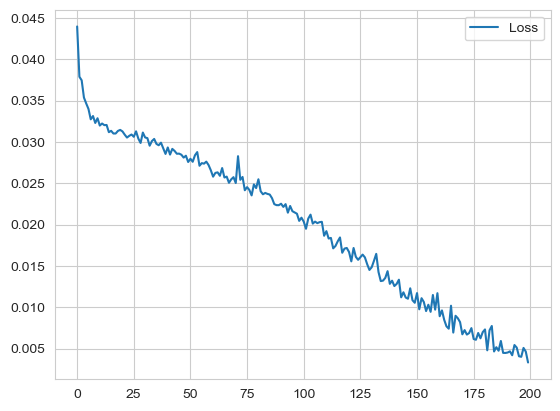

In [24]:
# Plotting the loss
plt.plot(history.history['loss'],label='Loss')
plt.legend()

plt.savefig("Loss")
plt.show()

## PREDICTIONS :-

In [25]:
# Take last 12 months values to make a prediction of first value of test set
last_train_batch = scaled_train[-12:]

# Reshape the data
last_train_batch = last_train_batch.reshape(1, 12, 1)

# Cehcking the shape
last_train_batch.shape


(1, 12, 1)

In [26]:
# Making Prediction
model.predict(last_train_batch)

1/1 [==============================] - 0s 131ms/step


array([[0.59441864]], dtype=float32)

In [27]:
# Actual first value
scaled_test[0]

array([0.26923077])

## PREDICTION ON TESTING SET :-

### Forecasting :-

In [28]:
# Create an empty list to store predictions
y_pred = []

# Take the last 'n_input' values from the scaled_train as the initial batch
first_batch = scaled_train[-n_inputs:]
current_batch = first_batch.reshape(1, n_inputs, n_features)  # Reshape the first batch

# Iterate through the testing set
for i in range(len(scaled_test)):

    # Get Prediction Value for the current batch using your trained model
    batch = current_batch
    pred = model.predict(batch)[0]

    # Append the prediction to the array
    y_pred.append(pred)

    # Update the current batch by removing the first value and adding the prediction
    current_batch = np.append(current_batch[:,1:, :], [[pred]], axis = 1)


y_pred


scaled_test

1/1 [==============================] - 0s 16ms/step


array([[0.26923077],
       [0.19230769],
       [0.11538462],
       [0.53846154],
       [0.53846154],
       [0.5       ],
       [0.19230769],
       [0.26923077],
       [0.26923077],
       [0.42307692],
       [0.57692308],
       [0.76923077]])

In [29]:
test_data

# Transform the values into original form
y_pred_transformed = scaler.inverse_transform(y_pred)

y_pred_transformed = np.round(y_pred_transformed,0)

y_pred_final = y_pred_transformed.astype(int)

y_pred_final

array([[16],
       [15],
       [12],
       [11],
       [15],
       [15],
       [17],
       [15],
       [10],
       [10],
       [19],
       [15]])

In [30]:
test_data.values, y_pred_final

test_data['Predictions'] = y_pred_final

test_data

,no_of_rainy_days,Predictions
month,,
2019-07-01,8,16
2019-08-01,6,15
2019-09-01,4,12
2019-10-01,15,11
2019-11-01,15,15
2019-12-01,14,15
2020-01-01,6,17
2020-02-01,8,15
2020-03-01,8,10


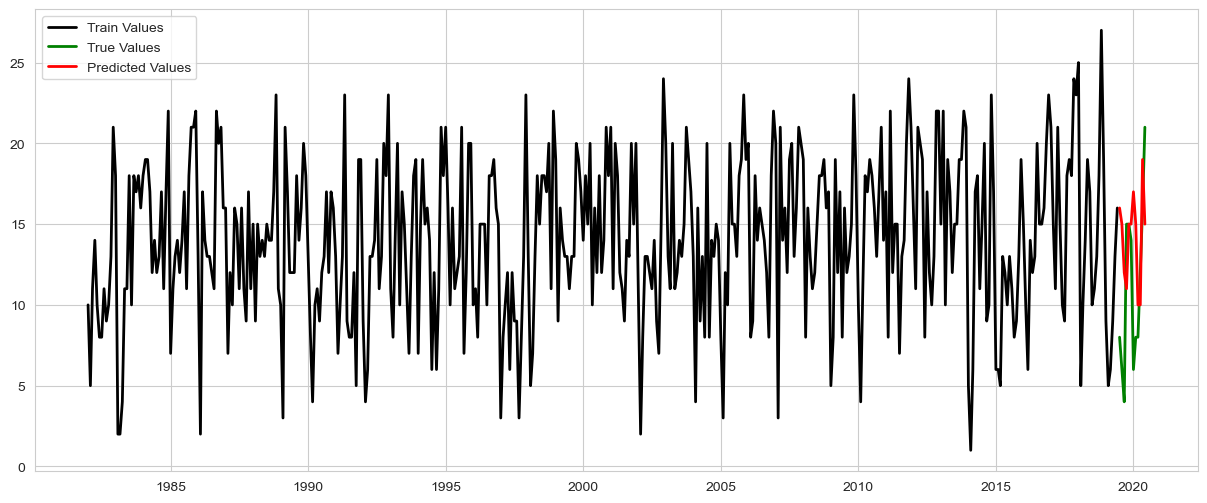

In [32]:
plt.figure(figsize=(15, 6))
plt.plot(train_data.index,train_data.no_of_rainy_days, linewidth=2, color='black', label='Train Values')
plt.plot(test_data.index, test_data.no_of_rainy_days, linewidth=2, color='green', label='True Values')
plt.plot(test_data.index, test_data.Predictions, linewidth=2, color='red', label='Predicted Values')
plt.legend()
plt.show()

### Mean Squared Error :-

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(test_data.no_of_rainy_days, test_data.Predictions))

6.1169164345008555

## SAVE MODEL :-

In [34]:
model.save('no_of_rainy_days.h5')